In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df = pd.read_csv("E:\Data Science\Assignments\KNN\KNN\Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
# Checking for null values.
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

<Axes: xlabel='type'>

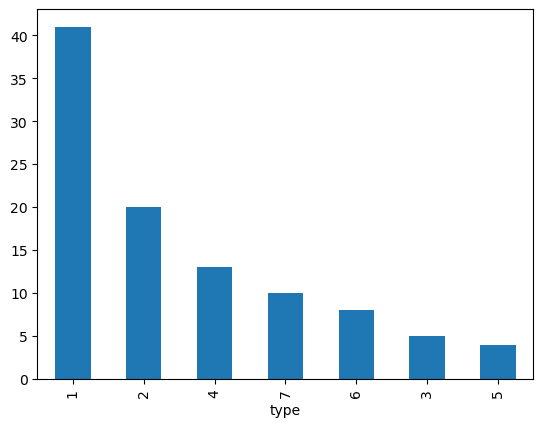

In [6]:
# Analyzing target variable

df['type'].value_counts().plot(kind='bar')

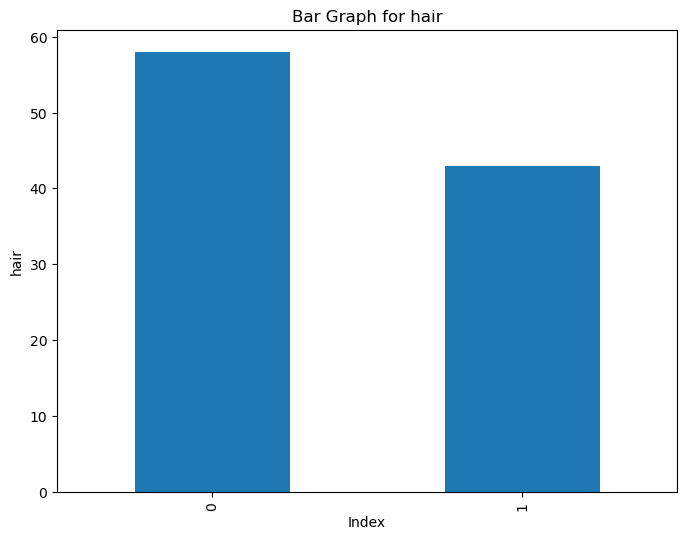

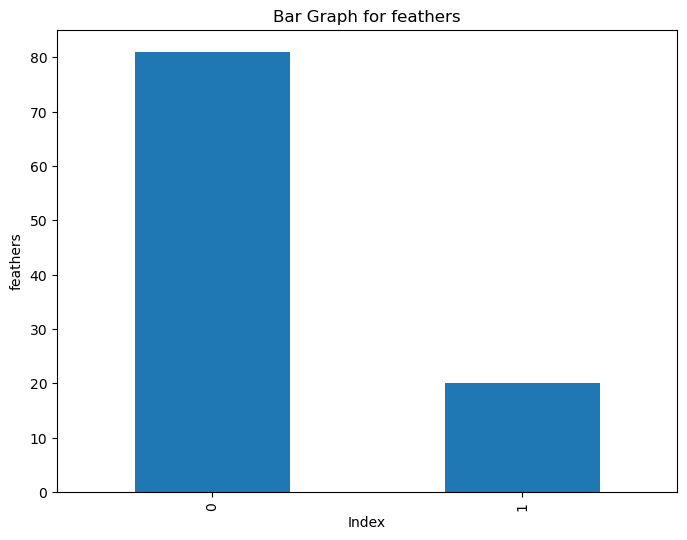

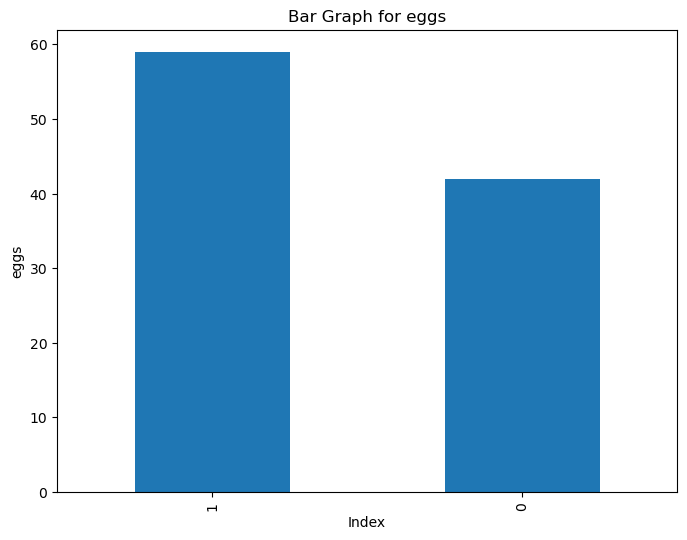

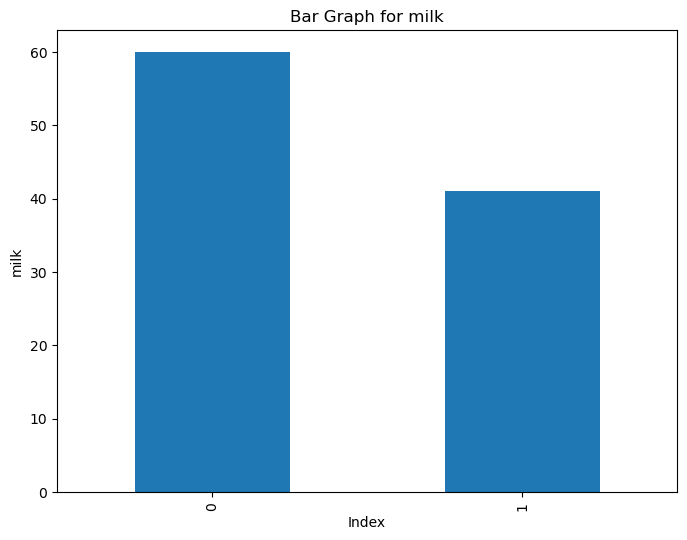

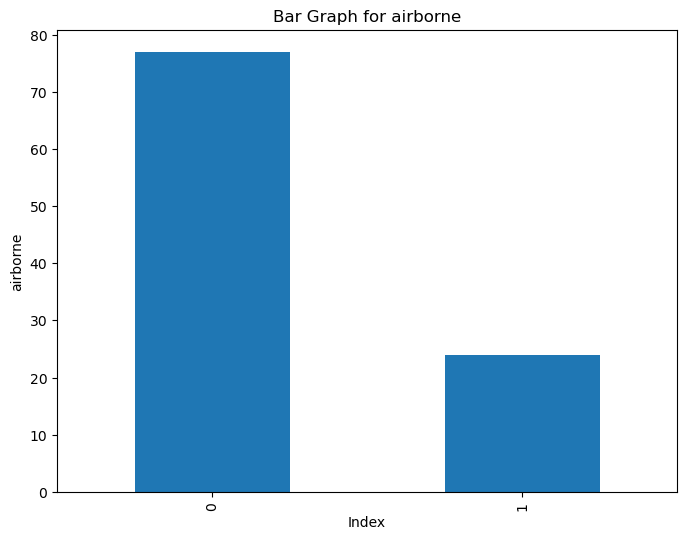

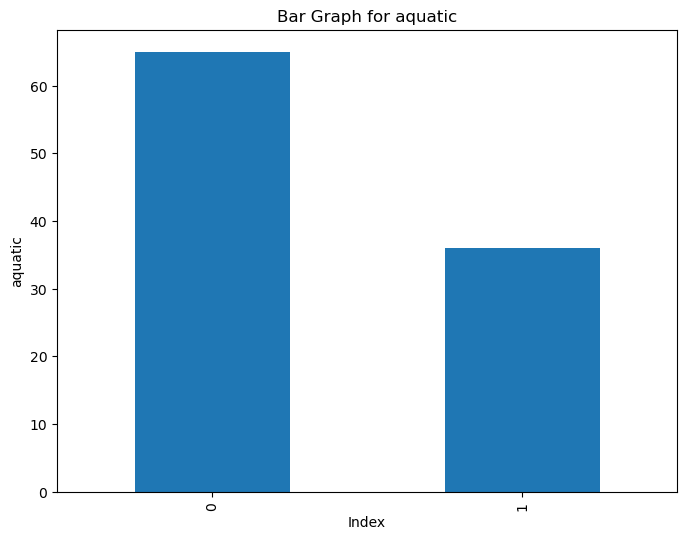

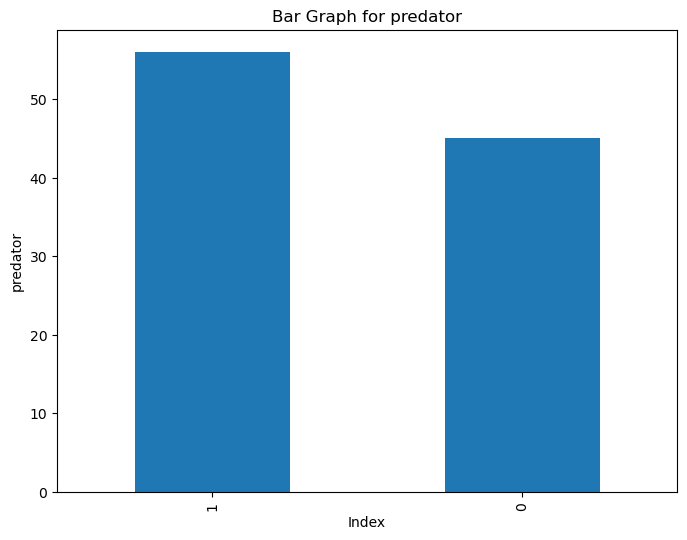

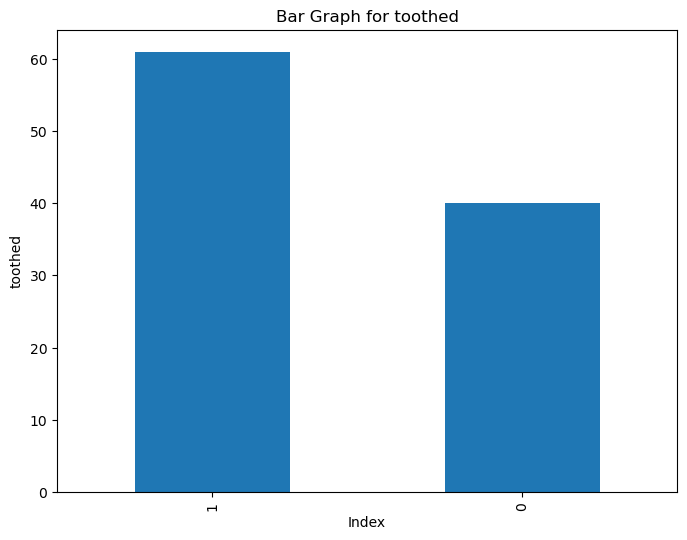

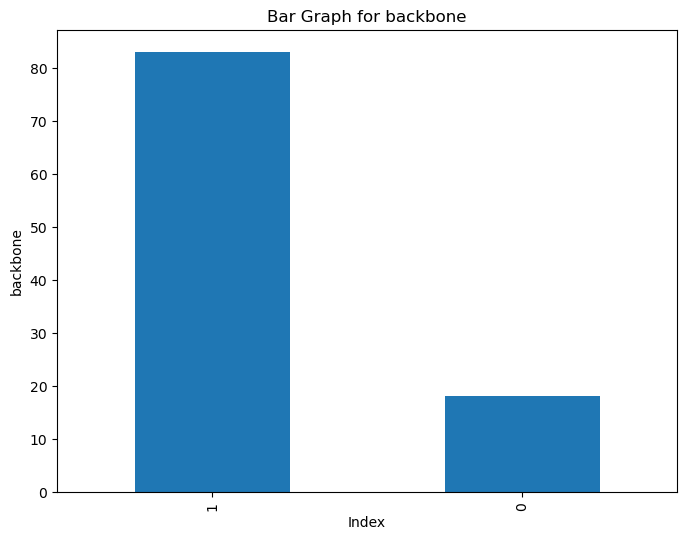

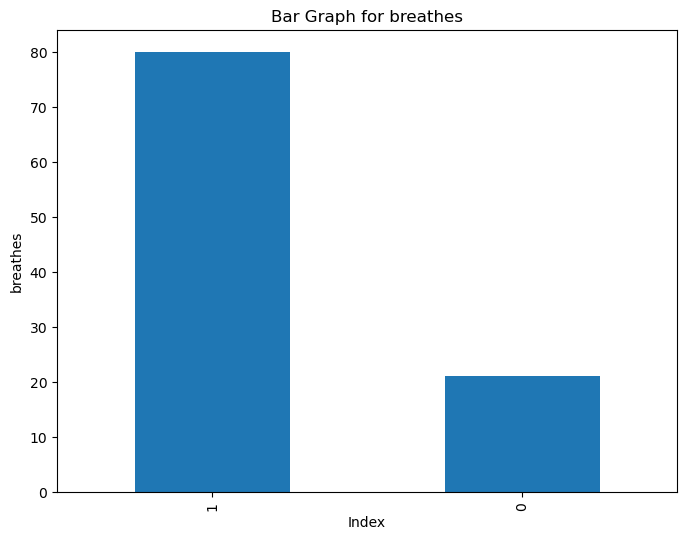

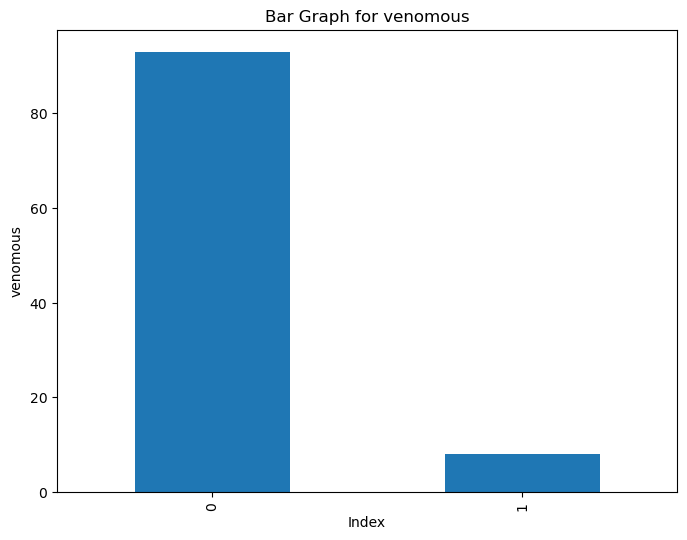

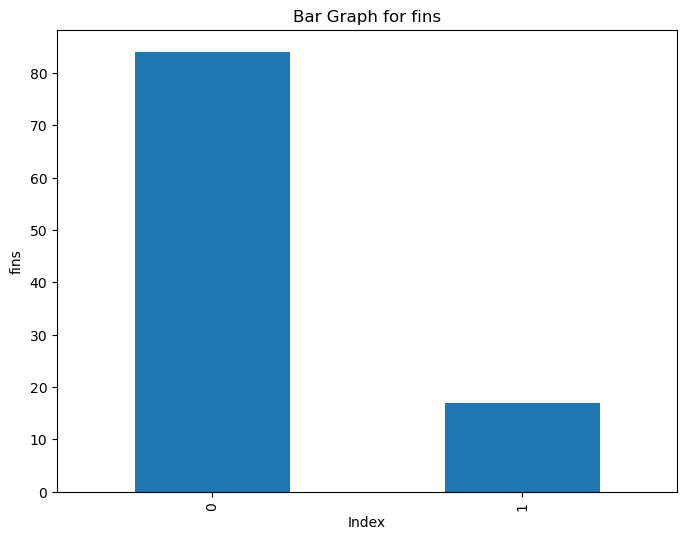

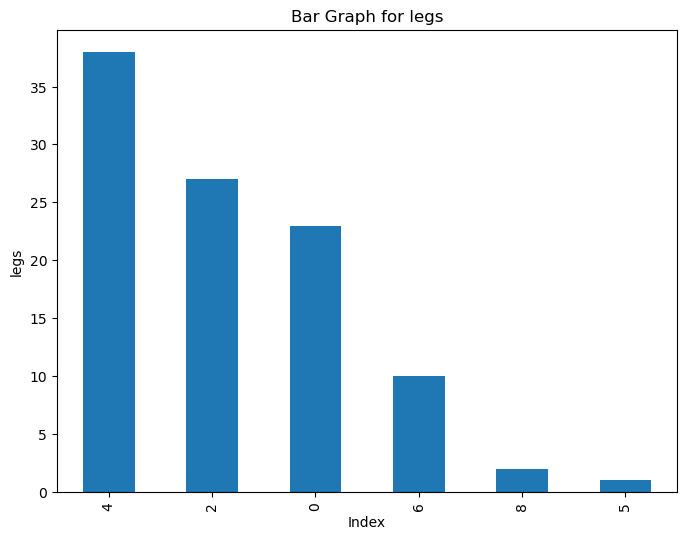

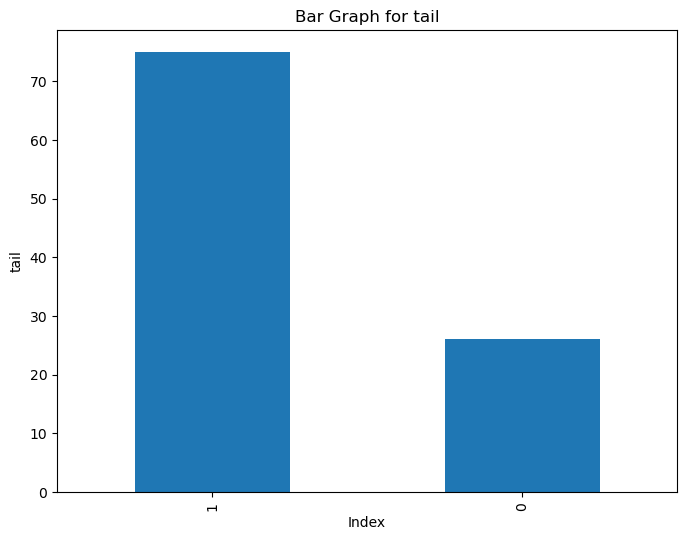

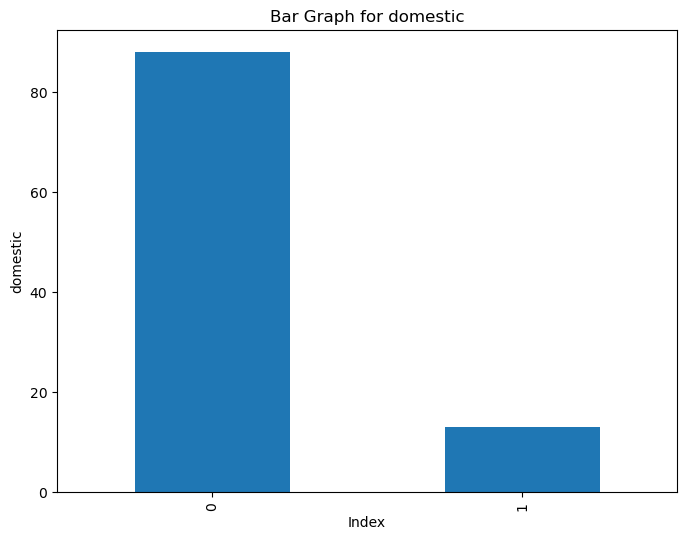

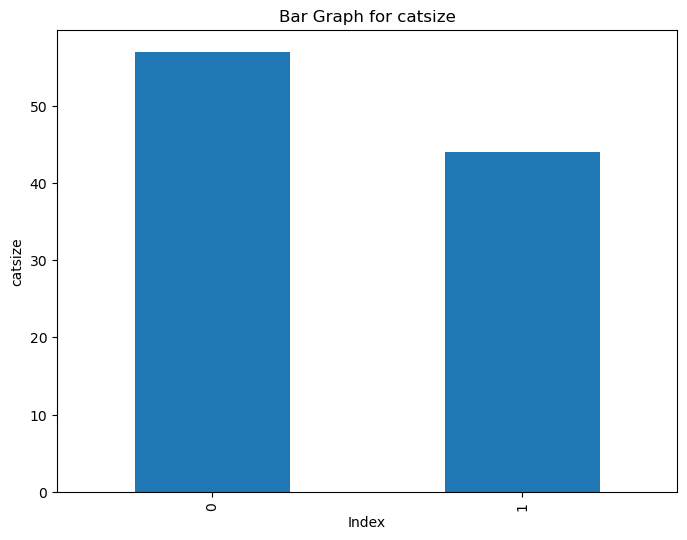

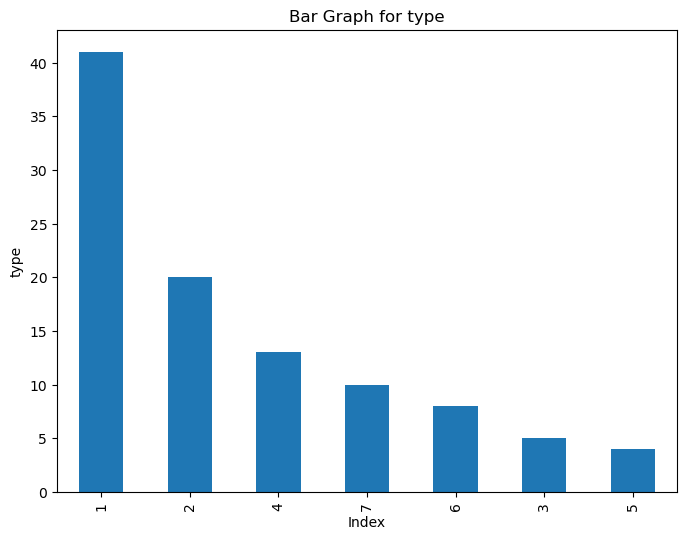

In [7]:
# Plotting bar plots for all columns.

for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Graph for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

In [8]:
# LabelEncoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['animal name'] = LE.fit_transform(df['animal name'])

In [9]:
# Data Partition

X = df.drop(columns=['type'],axis=1)
y = df['type']

In [10]:
# Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Finding best k-value and metric.

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [5, 7, 9, 11, 13],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit to the data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)


Best parameters found:  {'metric': 'cosine', 'n_neighbors': 5}
Best cross-validation accuracy:  0.75


In [12]:
# Final Model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(metric='cosine',n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=3)

In [13]:
# Predicting
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [14]:
# metrics
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
print("Training Accuracy score:" , ac1.round(3))
ac2 = accuracy_score(y_test,y_pred_test)
print("Test Accuracy score:" , ac2.round(3))

Training Accuracy score: 0.938
Test Accuracy score: 0.81


In [15]:
# cross validation
training_acc = []
test_acc = []

for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=i)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    training_acc.append(accuracy_score(y_train,y_pred_train))
    test_acc.append(accuracy_score(y_test,y_pred_test))

import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))


Cross validation - Training accuracy: 0.94
Cross validation - Test accuracy: 0.83


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.69
Recall: 0.71
F1 Score: 0.70


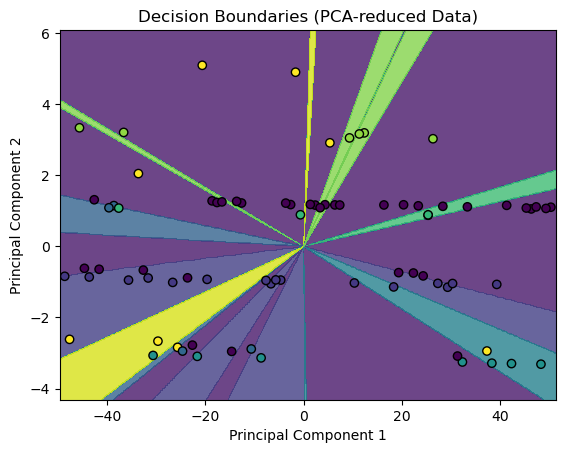

In [17]:
# Visualize the decision boundaries of the classifier.

import numpy as np
# This part is challenging due to the high dimensionality of the data. 
# We'll use PCA to reduce to 2D for visualization.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit the classifier on the reduced data
model.fit(X_train_pca, y_train)

# Create a meshgrid for plotting decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k')
plt.title('Decision Boundaries (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



#### 1. What are the key hyperparameters in KNN?
- In k-Nearest Neighbors (KNN), there are a few key hyperparameters. They are :-
    1. Number of Neighbors (k)
    2. Distance Metric
    3. Algorithm
    4. Weight Function
    5. Leaf Size
    6. p (for Minkowski Distance)

#### 2. What distance metrics can be used in KNN?
- Here are some commonly used distance metrics in KNN:
    1. Euclidean Distance
    2. Manhattan Distance
    3. Minkowski Distance
    4. Hamming Distance
    5. Cosine Similarity